# 🟩 1. 커스텀 데이터셋 제작         

- 데이터로더(필수 내용)     
- 각 훈련별로 '어떻게 훈련 되고 있는가?' -> wandb, comet.ml(정확도, loss 그래프 출력)  

In [ ]:
import torch #훈련
from torch.utils.data import Dataset, DataLoader #커스텀 데이터셋을 만들기 위함

import os #로컬 컴퓨터에서 데이터셋을 불러오기 위해
import cv2 # 시각화 해서 표현하기 위함

In [3]:
# __함수__ : 던더 함수
class SimpleDataset(Dataset):
    #이 클래스의 객체가 생성되면 무조건 __init__ 함수가 동작하게 됨
    #기초 데이터, 함수 동작하도록 연결
    def __init__(self, t):
        self.t = t

    #데이터셋의 길이 반환
    #파이토치가 훈련을 할 때 len() -> 배치사이즈 대비 얼마나 데이터셋이 남아있는 지 체크할 때 씀
    def __len__(self):
        return self.t

    #데이터 + 라벨 -> 한 쌍을 뽑는 데 씀
    #idx = 몇 번째 데이터? 
    def __getitem__(self, idx):
        return torch.LongTensor([idx])

In [ ]:
dataset = SimpleDataset(t=7)
#이 데이터셋을 훈련에서 어떻게 활용할 것인가? 
dataloader = DataLoader(dataset = dataset ,   #어떤 데이터셋을 훈련에 쓸 거니?
                        batch_size = 2, #데이터셋을 쪼개 배치로 만듦
                        shuffle = True,    #데이터셋을 섞어주는(랜덤)
                        drop_last = True)  #배치사이즈 만들고 남은 데이터 쓸거야?

In [7]:
for e in range(3):
    print(f"epoch : {e}")

    for batch in dataloader:
        print(batch)
        print(type(batch))

epoch : 0
tensor([[2],
        [4]])
<class 'torch.Tensor'>
tensor([[0],
        [1]])
<class 'torch.Tensor'>
tensor([[3],
        [6]])
<class 'torch.Tensor'>
epoch : 1
tensor([[0],
        [3]])
<class 'torch.Tensor'>
tensor([[4],
        [6]])
<class 'torch.Tensor'>
tensor([[5],
        [1]])
<class 'torch.Tensor'>
epoch : 2
tensor([[4],
        [6]])
<class 'torch.Tensor'>
tensor([[3],
        [5]])
<class 'torch.Tensor'>
tensor([[2],
        [1]])
<class 'torch.Tensor'>


<br>

## 🟢 이미지 데이터셋을 커스텀화 함          

- 이미지(0~255) 숫자로 이루어진 데이터 -> 딥러닝 -> 텐서 형태로 표현  
- 텐서 형태로 이미지를 표현해 줘야 함.  

In [9]:
from torchvision import transforms #torchvision -> 딥러닝(이미지) 수행하는 클래스 이름 #transform 이미지를 조절
from PIL import Image #-> 이미지를 표현할 수 있는 파이썬 라이브러리 
import matplotlib.pyplot as plt

In [14]:
class CustomData(Dataset):
    def __init__(self, path, transform):
        self.image_path = path     #전체 이미지 경로를 저장
        self.transform = transform #이미지에 대해 일괄적으로 적용할 '전처리'
        
    def __len__(self):
        #if (이미지수 == 라벨수) return 이미지 수
        return len(self.image_path)

    #텐서 형태로 변환된 이미지를 돌려줌
    def __getitem__(self, idx):
        image = self.image_path[idx]
        image = Image.open(image)    #해당 경로에서 이미지를 읽어 옴

        if self.transform is not None:
            result = self.transform(image)

        #csv,파일 이름 등을 이용해서 데이터에 맞는 라벨을 반환
        label = 1 

        return result, label

In [17]:
transform = transforms.Compose([
    #전처리의 다양한 종류를 여기서 적용해준다.
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [13]:
image_list[0]

'C:/Users/jeong/Desktop/영등포/11.16 커스텀 데이터셋/train/images155_jpg.rf.6510326f4e08692468f8c60f6934ace3.jpg'

In [12]:
origin = 'C:/Users/jeong/Desktop/영등포/11.16 커스텀 데이터셋/train/'
image_list = [os.path.join(origin, x) for x in os.listdir(origin)]

In [11]:
origin = 'C:/Users/jeong/Desktop/영등포/11.16 커스텀 데이터셋/train/'
os.listdir(origin)

['images155_jpg.rf.6510326f4e08692468f8c60f6934ace3.jpg',
 'images155_jpg.rf.d52331a1efd3497d57283d1437a06972.jpg',
 'images173_jpg.rf.40da7b523d4fc56a96e4fa58a6039c68.jpg',
 'images173_jpg.rf.c5c6f2b1fc5f0e14cca036e579a72ebb.jpg',
 'images173_jpg.rf.e6009752e2a4db6d57d0d65f0347f94c.jpg',
 'images175_jpg.rf.28afa3643b5f6fe65a4c73275f68da9c.jpg',
 'images175_jpg.rf.3695d7f574498837e4cb72c15fb6be36.jpg',
 'images175_jpg.rf.4ba3231f768791260462007e61676734.jpg',
 'images175_jpg.rf.adfd1bc45a7e19ebfa9edcb943582e4d.jpg',
 'images175_jpg.rf.b2452d978ced928af5ebd83fdc9de7c3.jpg',
 'images175_jpg.rf.dc55605abba4c43a190af69ed68dad82.jpg',
 'images179_jpg.rf.334d63b80484e8771365209d9d1afd57.jpg',
 'images179_jpg.rf.4a0a4553ad99091906975dd272d30b81.jpg',
 'images179_jpg.rf.4bc8df5167bf75f09b7cd7be98318d2b.jpg',
 'images179_jpg.rf.601a2a78e805950bdaf051c972280a2e.jpg',
 'images179_jpg.rf.6fb9d2ef11ed5e7a50b598b3f5ddf22b.jpg',
 'images179_jpg.rf.724fd8a7a468acced6f75997ecc5b993.jpg',
 'images179_jp

<br>

## 🟢 이미지리스트를 내가 만든 데이터셋 클래스에 적용  

In [18]:
dataset = CustomData(image_list, transform) #이미지에 대한 경로, 일괄적으로 적용할 전처리
dataloader = DataLoader(dataset = dataset,
                        batch_size = 25,
                        shuffle = True,
                        drop_last = False)

In [20]:
dataiter = iter(dataloader)
batch = next(dataiter)

In [21]:
images, labels = batch

In [24]:
len(images), len(labels)

(25, 25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8956583..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clippi

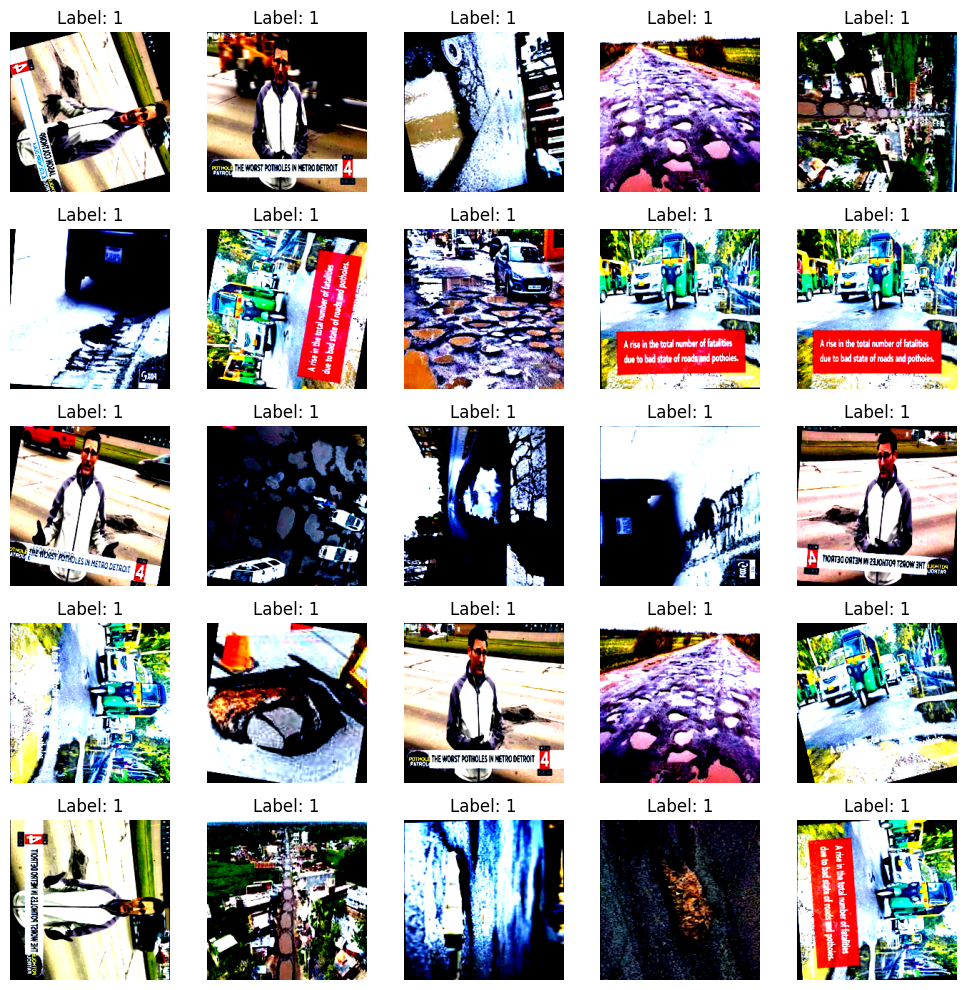

In [25]:
# Matplotlib로 첫 번째 데이터 배치 출력
# 이미지가 배치 (N, C, H, W) 형태라고 가정 (예: N=25, C=3, H=224, W=224)
def imshow(img, title=None):
    """이미지 시각화를 위한 함수"""
    img = img.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# 배치의 첫 번째 이미지 출력
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(5, 5, i + 1)  # 5x5 그리드 생성 (25개의 이미지)
    imshow(images[i])
    plt.title(f"Label: {labels[i].item()}")
plt.tight_layout()
plt.show()

In [26]:
!pip install wandb

import wandb

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.models as models
import torchvision.transforms as transforms

In [29]:
wandb.init(
    project="poth_resnet2",  # 프로젝트 이름
    #config.yaml
    config={
        "epochs": 5,
        "batch_size": 25,
        "learning_rate": 0.001,
        "optimizer": "Adam",
        "model": "ResNet18"
    }
)

In [32]:
# ResNet 모델 정의
model = models.resnet18(pretrained=True)
num_classes = 2  # 데이터셋의 클래스 개수에 맞게 설정
model.fc = nn.Linear(model.fc.in_features, num_classes)

# GPU 사용 여부
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 훈련
num_epochs = wandb.config.epochs

for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0

    for i, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)  # 데이터 GPU로 이동

        optimizer.zero_grad()  # 옵티마이저 초기화
        outputs = model(images)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()

        # **WandB 배치 로깅**
        wandb.log({"batch_loss": loss.item()})

    # 에포크 종료 시 평균 손실 로그 기록
    avg_loss = running_loss / len(dataloader)
    wandb.log({"epoch_loss": avg_loss, "epoch": epoch + 1})
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Training complete!")

# 모델 저장 (선택 사항)
torch.save(model.state_dict(), "resnet18_poth_dataset.pth")
wandb.save("resnet18_poth_dataset.pth")
print("Model saved!")

C:\ProgramData\anaconda3\envs\yolo\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\yolo\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.1336
Epoch [2/5], Loss: 0.0003
Epoch [3/5], Loss: 0.0000
Epoch [4/5], Loss: 0.0000
Epoch [5/5], Loss: 0.0000
Training complete!
Model saved!
